In [11]:
# numpy, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
def read_CSV(csvPath, DeleteId=True, SupervisedLearning=True,nrows=990006):
    '''
    读入csv文件，如果训练无监督学习删除label = -1 的列
    :param csvPath:
    :param SupervisedLearning:
    :return:
    '''
    df = pd.read_csv(csvPath,nrows=nrows)
    #df = pd.read_csv(csvPath)
    if DeleteId:
        df.drop('id', 1, inplace=True)
    if SupervisedLearning:
        list = np.where(df.label == -1)  # 删除-1的行，当监督学习
        df.drop(df.index[list], inplace=True)
    else:
        pass
    return df


def plotMissing_Num(df):
    '''
    按行统计每个样本的属性缺失值个数，将缺失值个数从小到大排序，以序号为横坐标，
   缺失值个数为纵坐标，画出散点图,以此来观察异常值
   对比 trainset 和 testset 上的样本的属性缺失值个数，可以发现其分布基本一致
    '''
    df['missing_num'] = df.apply(lambda x : (len(x)-x.count()),axis=1)
    plt.scatter(df.index,sorted(df['missing_num']))
    df.drop('missing_num',1,inplace=True)

In [13]:
train = read_CSV('atec_anti_fraud_train.csv')
test = read_CSV('atec_anti_fraud_test_a.csv',SupervisedLearning=False)

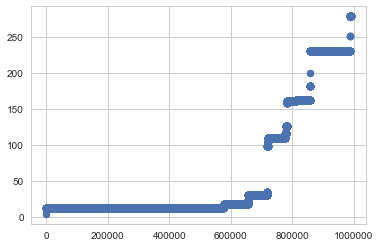

In [15]:
plotMissing_Num(train)

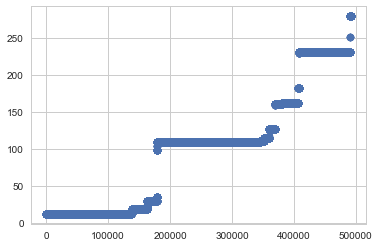

In [16]:
plotMissing_Num(test)